In [25]:
using LinearAlgebra
using Test

import Base.*, Base.\

In [26]:
"""
    PasovnaMatrika{T}(pasovi, n)

Matrika ki ima le nekaj neničelnih pasov
Attributes:
n - velikost matrike
pasovi - Dict{Int, Vector{T}}, kjer so keyi ... -2, -1, 0, 1, 2 ..., oz tisti pasovi ki vsebujejo neničelne vrednosti, 
            negativne vrednosti označujejo pasove pod diagonalo, 0 je pas diagonale in pozitivni so pasovi nad diagonalo

Primer:
PasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (-1, [5, 6, 7]), (1, [8, 9, 10]), (2, [11, 12])]), 4)
describes matrix [1 8 11 0; 5 2 9 12; 0 6 3 10; 0 0 7 4]
"""
struct PasovnaMatrika{T} <: AbstractArray{T, 2}
    pasovi::Dict{Int, Vector{T}} # 0 diagonala, 1, 2, 3...nad diagonalo, -1, -2, ... pod diagonalo
    n::Int
end

"""
    ZgornjePasovnaMatrika{T}(pasovi, n)

Matrika ki ima nekaj neničelnih pasov nad diagonalo
Attributes:
n - velikost matrike
pasovi - Dict{Int, Vector{T}}, kjer so keyi 0, 1, 2 ..., oz tisti pasovi ki vsebujejo neničelne vrednosti, 
            0 je pas diagonale, pozitivni so pasovi nad diagonalo

Primer:
PasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (1, [8, 9, 10]), (2, [11, 12])]), 4)
describes matrix [1 8 11 0; 0 2 9 12; 0 0 3 10; 0 0 0 4]
"""
struct ZgornjePasovnaMatrika{T} <: AbstractArray{T, 2}
    pasovi::Dict{Int, Vector{T}} 
    n::Int
end

"""
    SpodnjePasovnaMatrika{T}(pasovi, n)

Matrika ki ima nekaj neničelnih pasov pod diagonalo
Attributes:
n - velikost matrike
pasovi - Dict{Int, Vector{T}}, kjer so keyi ... -2, -1, 0, oz tisti pasovi ki vsebujejo neničelne vrednosti, 
            negativne vrednosti označujejo pasove pod diagonalo, 0 je pas diagonale 

Primer:
PasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (-1, [5, 6, 7])]), 4)
describes matrix [1 0 0 0; 5 2 0 0; 0 6 3 0; 0 0 7 4]
"""
struct SpodnjePasovnaMatrika{T} <: AbstractArray{T, 2}
    pasovi::Dict{Int, Vector{T}} 
    n::Int
end

SpodnjePasovnaMatrika

In [27]:
"""
    size(M)

Vrne velikost pasovne matrike M
"""
function Base.size(M::PasovnaMatrika)
    return (M.n, M.n)
end

"""
    size(M)

Vrne velikost zgornje pasovne matrike M
"""
function Base.size(M::ZgornjePasovnaMatrika)
    return (M.n, M.n)
end

"""
    size(M)

Vrne velikost spodnje pasovne matrike M
"""
function Base.size(M::SpodnjePasovnaMatrika)
    return (M.n, M.n)
end

Base.size

In [28]:
"""
    getindex(M, I(2))

Vrne element pasovne matrike na mestu I
"""
function Base.getindex(M::PasovnaMatrika, I::Vararg{Int, 2})
    pas = I[2] - I[1]
    if haskey(M.pasovi, pas)
        if pas >= 0
            return M.pasovi[pas][I[1]]
        else 
            return M.pasovi[pas][I[2]]
        end
    else
        return 0
    end
end

"""
    getindex(M, I(2))

Vrne element zgornje pasovne matrike na mestu I
"""
function Base.getindex(M::ZgornjePasovnaMatrika, I::Vararg{Int, 2})
    pas = I[2] - I[1]
    if haskey(M.pasovi, pas)
        return M.pasovi[pas][I[1]]
    else
        return 0
    end
end

"""
    getindex(M, I(2))

Vrne element spodnje pasovne matrike na mestu I
"""
function Base.getindex(M::SpodnjePasovnaMatrika, I::Vararg{Int, 2})
    pas = I[2] - I[1] 
    if haskey(M.pasovi, pas)
        return M.pasovi[pas][I[2]]
    else
        return 0
    end
end

Base.getindex

In [29]:
"""
    setindex(M, v, I(2))

Nastavi element na mestu I na vrednost v
Vrne napako če spreminjamo vrednosti v ničelih pasovih
"""
function Base.setindex!(M::PasovnaMatrika, v, I::Vararg{Int, 2})
    pas = I[2] - I[1]
    if haskey(M.pasovi, pas)
        if pas >= 0
            M.pasovi[pas][I[1]] = v
        else 
            M.pasovi[pas][I[2]] = v
        end
    else
        return error("Vrednosti se lahko nastavi samo v neničelnih pasovih") # dodaj cel pas naenkrat? -> setindex!(A, X, I...)
    end
end

"""
    setindex(M, v, I(2))

Nastavi element na mestu I na vrednost v
Vrne napako če spreminjamo vrednosti v ničelih pasovih
"""
function Base.setindex!(M::SpodnjePasovnaMatrika, v, I::Vararg{Int, 2})
    pas = I[2] - I[1]
    if haskey(M.pasovi, pas)
        M.pasovi[pas][I[2]] = v
    else
        return error("Vrednosti se lahko nastavi samo v neničelnih pasovih") 
    end
end

"""
    setindex(M, v, I(2))

Nastavi element na mestu I na vrednost v
Vrne napako če spreminjamo vrednosti v ničelih pasovih
"""
function Base.setindex!(M::ZgornjePasovnaMatrika, v, I::Vararg{Int, 2})
    pas = I[2] - I[1]
    if haskey(M.pasovi, pas)
        M.pasovi[pas][I[1]] = v
    else
        return error("Vrednosti se lahko nastavi samo v neničelnih pasovih") 
    end
end

Base.setindex!

In [30]:
"""
    M*v

Zmnoži pasovno matriko M z vektorjem v
"""
function *(M::PasovnaMatrika, v::Vector)
    y = zeros(length(v))
    for (k, pas) in M.pasovi
        for i=1:length(pas)
            row = k<=0 ? -k+i : i # indeks elemneta v pasu
            col = k<=0 ? i : k+i # indeks elemnta v pasu
            y[row] += v[col] * pas[i]
        end
    end
    return y
end

"""
    M*v

Zmnoži tgornje pasovno matriko M z vektorjem v
"""
function *(M::ZgornjePasovnaMatrika, v::Vector)
    y = zeros(length(v))
    for (k, pas) in M.pasovi
        for i=1:length(pas)
            row = i # indeks elemneta v pasu
            col = k+i # indeks elemnta v pasu
            y[row] += v[col] * pas[i]
        end
    end
    return y
end

"""
    M*v

Zmnoži spodnje pasovno matriko M z vektorjem v
"""
function *(M::SpodnjePasovnaMatrika, v::Vector)
    y = zeros(length(v))
    for (k, pas) in M.pasovi
        for i=1:length(pas)
            row = -k+i # indeks elemneta v pasu
            col = i # indeks elemnta v pasu
            y[row] += v[col] * pas[i]
        end
    end
    return y
end

Base.:*

In [104]:
"""
    M\\b

Izračuna rešitev sistema Mx=b za pasovno matriko M
"""
function \(M_in::PasovnaMatrika, b::Vector)
    bc = deepcopy(b)
    M = deepcopy(M_in)
    z_pas = maximum(keys(M.pasovi))
    l_pas = minimum(keys(M.pasovi))

    for j=1:M.n
        for i=j+1:min(M.n, -l_pas+j)
            l = M[i, j] / M[j, j]
            M[i, j] = 0
            for k=j+1:min(z_pas+j+1, M.n)
                M[i, k] -= l * M[j, k]
            end
            bc[i] -= bc[j] * l 
        end
    end

    x = zeros(M.n)
    for i=M.n:-1:1
        curr = bc[i] 
        for ii=min(M.n, z_pas+i):-1:i
            curr -= M[i, ii] * x[ii]
        end
        x[i] = curr / M[i, i]
    end
    return x
end

"""
    M\\b

Izračuna rešitev sistema Mx=b za spodnje pasovno matriko M
"""
function \(M::SpodnjePasovnaMatrika, b::Vector)
    l_pas = minimum(keys(M.pasovi))
    x = zeros(M.n)
    for i=1:M.n
        curr = b[i] 
        for ii=max(1, l_pas+i):(i-1)
            curr -= M[i, ii] * x[ii]
        end
        x[i] = curr / M[i, i]
    end
    return x
end

"""
    M\\b

Izračuna rešitev sistema Mx=b za zgornje pasovno matriko M
"""
function \(M::ZgornjePasovnaMatrika, b::Vector)
    z_pas = maximum(keys(M.pasovi))
    x = zeros(M.n)
    for i=M.n:-1:1
        curr = b[i] 
        for ii=min(M.n, z_pas+i):-1:i
            curr -= M[i, ii] * x[ii]
        end
        x[i] = curr/ M[i, i]
    end
    return x
end

Base.:\

In [105]:
import LinearAlgebra.lu

"""
    lu(M)

Izračuna LU razcep pasovne matrike M, vrne zgornje pasovno matriko U in spodnje pasovno matriko L
L, U = lu(M)
"""
function lu(M::PasovnaMatrika)
    p = Dict{Int64, Vector{Float64}}()
    for (k, pas) in M.pasovi
        if k<0
            p[k] = zeros(length(pas))
        elseif  k==0
            p[k] = ones(length(pas))
        end
    end
    L = SpodnjePasovnaMatrika(p, M.n)
    
    l_pas = minimum(keys(M.pasovi))
    z_pas = maximum(keys(M.pasovi))
    A = deepcopy(M)
    
    for j=1:M.n
        for i=j+1:-l_pas+1
            l = A[i, j] / A[j,j]
            L[i, j] = l

            for k=j+1:min(z_pas+j+1, M.n)
                if A[j,j] < A[j,k]
                    error("Ni diagonalno dominantna")
                end
                A[i, k] = A[i, k] - l * A[j, k]
            end
        end
    end 

    pu = Dict{Int64, Vector{Float64}}()
    for (k, pas) in A.pasovi
        if  k==0
            pu[k] = copy(pas)
        elseif k>0
            pu[k] = copy(pas)
        end
    end
    U = ZgornjePasovnaMatrika(pu, M.n)
    return (L, U)
end


LinearAlgebra.lu

In [106]:
@testset "pasovna" begin
    eps = 1e-6

    M = [1 8 11 0; 5 2 9 12; 0 6 3 10; 0 0 7 4]
    P = PasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (-1, [5, 6, 7]), (1, [8, 9, 10]), (2, [11, 12])]), 4)
    for i=1:4, j=1:4
        @test P[i, j] == M[i, j] # test get index?
    end
    @test size(P) == size(M) # test size

    for a = [1, 2], b = [1, 3]
        val = a+b
        P[a, b] = val
        @test P[a, b] == val
    end

    # *
    P = PasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (-1, [5, 6, 7]), (1, [8, 9, 10]), (2, [11, 12])]), 4)
    v = [1, 2, 3, 4]
    @test norm(P*v - M*v) < eps

    P = PasovnaMatrika(Dict([(0, [1.0, 2, 3, 4]), (-1, [5.0, 6, 7]), (1, [8.0, 9, 10]), (2, [11.0, 12])]), 4) # float
    v = [1, 2, 3, 4.0]
    x = P\v
    @test norm(P*x - v) < eps

    # lu
    P = PasovnaMatrika(Dict([(0,[10.0, 15.0, 9.0]), (-1,[4.0, 8.0]), (1, [2.0, 6.0]), (-2, [7.0])]), 3)
    M = [10 2 0; 4 15 6; 7 8 9]
    L, U = lu(P)
    @test norm(L*U - P) < eps
    Lm, Um = lu(M)
    @test norm(L - Lm) < eps
    @test norm(U - Um) < eps

end

@testset "zgornje-pasovna" begin
    eps = 1e-6

    M = [1 8 11 0; 0 2 9 12; 0 0 3 10; 0 0 0 4]
    P = ZgornjePasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (1, [8, 9, 10]), (2, [11, 12])]), 4)
    for i=1:4, j=1:4
        @test P[i, j] == M[i, j] # test get index?
    end
    @test size(P) == size(M) # test size

    for a = [1, 2], b = [2, 3]
        val = a+b
        P[a, b] = val
        @test P[a, b] == val
    end

    P = ZgornjePasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (1, [8, 9, 10]), (2, [11, 12])]), 4)
    v = [1, 2, 3, 4]
    @test norm(P*v - M*v) < eps

    P = ZgornjePasovnaMatrika(Dict([(0, [1.0, 2, 3, 4]), (1, [8.0, 9, 10]), (2, [11.0, 12])]), 4)
    v = [1, 2, 3, 4.0]
    x = P\v
    @test norm(P*x - v) < eps
end

@testset "spodnje-pasovna" begin
    eps = 1e-6

    M = [1 0 0 0; 5 2 0 0; 11 6 3 0; 0 12 7 4]
    P = SpodnjePasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (-1, [5, 6, 7]), (-2, [11, 12])]), 4)
    for i=1:4, j=1:4
        @test P[i, j] == M[i, j] # test get index?
    end
    @test size(P) == size(M) # test size

    for a = [3, 4], b = [2, 3]
        val = a+b
        P[a, b] = val
        @test P[a, b] == val
    end

    P = SpodnjePasovnaMatrika(Dict([(0, [1, 2, 3, 4]), (-1, [5, 6, 7]), (-2, [11, 12])]), 4)
    v = [1, 2, 3, 4]
    @test norm(P*v - M*v) < eps

    P = SpodnjePasovnaMatrika(Dict([(0, [1.0, 2, 3, 4]), (-1, [5.0, 6, 7]), (-2, [11.0, 12])]), 4)
    v = [1, 2, 3, 4.0]
    x = P\v
    @test norm(P*x - v) < eps
end


Test Summary: | Pass  Total
pasovna       |   26     26
Test Summary:   | Pass  Total
zgornje-pasovna |   23     23
Test Summary:   | Pass  Total
spodnje-pasovna |   23     23


Test.DefaultTestSet("spodnje-pasovna", Any[], 23, false, false)

In [34]:
# example, functions copied from NumMat.... (types did not match...)
using NumMat

In [114]:
function desne_strani(s, d, z, l)
    n = length(s)
    m = length(l)
    b = zeros(n*m)
    b[1:n] -= s # j = 1
    b[n:n:end] -= d # i = n
    b[end-n+1:end] -= z # j = m
    b[1:n:end-n+1] -= l # i = 1
    return b
end

desne_strani (generic function with 2 methods)

In [113]:
function matrika(n, m)
    pasovi = Dict([(0, -4*ones(n)), (1, ones(n-1)), (-1, ones(n-1))])
    L = PasovnaMatrika(pasovi, n)
    I = PasovnaMatrika(Dict([(0, ones(n))]), n)

    pasoviA = Dict{Int64, Vector{Float64}}(i => zeros(n*m-abs(i)) for i=-2n:2n)
    A = PasovnaMatrika(pasoviA, n*m)
    
    for j=1:m
        k = ((j-1)*n+1):(j*n) # indeksi v j-tem bloku  
        A[k,k] = L
        if j < m
            A[k,k.+ n] = I
            A[k.+n, k] = I
        end
    end
    return A
end

matrika (generic function with 1 method)

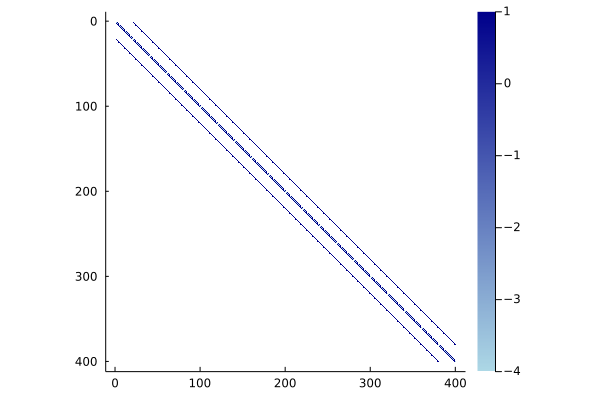

In [116]:
robni_problem = RobniProblemPravokotnik(
    LaplaceovOperator{2},
    ((0, pi), (0, pi)),
    [sin, y->0, sin, y->0] 
)

# resi 

nx = 20
ny = 20
(a, b), (c, d) = robni_problem.meje
Z = zeros(nx + 2, ny + 2)
x = LinRange(a, b, nx + 2)
y = LinRange(c, d, ny + 2)
Z[:, 1] = robni_problem.rp[1].(x)
Z[end, :] = robni_problem.rp[2].(y)
Z[:, end] = robni_problem.rp[3].(x)
Z[1, :] = robni_problem.rp[4].(y)

L = matrika(nx, ny) # pasovna matrika

b = desne_strani(Z[2:end-1, 1], Z[end, 2:end-1],
     Z[2:end-1, end], Z[1, 2:end-1])

Z[2:end-1, 2:end-1] = reshape(L\b, nx, ny)

spy(L, seriescolor = :blues)

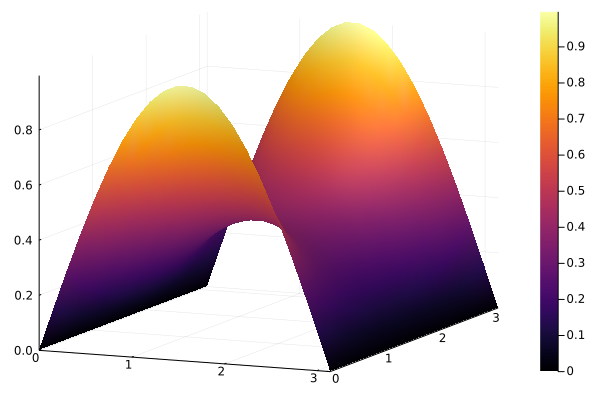

In [117]:
using Plots
surface(x, y, Z')